In [33]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

from PIL import Image
import cv2
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib Inline

In [37]:
def get_kmeans(path, key):
    arr_list = []
    for root, dirs, names in os.walk(path):
        for image in names:
            if key not in image:
                continue
            image_path = os.path.join(root, image)
            img = Image.open(image_path)
            arr_list.append(np.array(img))
    
    arr = np.stack(arr_list, 0)
    arr_flat = arr.reshape((arr.shape[0], -1))
    
    pca = PCA(2)
    y_pca = pca.fit_transform(arr_flat)
    
    kmeans = KMeans(n_clusters= 2)
    label = kmeans.fit_predict(y_pca)
    
    label_0 = y_pca[label == 0]
    label_1 = y_pca[label == 1]

    #Plotting the results
    plt.scatter(label_0[:,0] , label_0[:,1] , color = 'red')
    plt.scatter(label_1[:,0] , label_1[:,1] , color = 'blue')
    plt.show()
    
    return y_pca, label

In [18]:
path = "/Tmp/dingqian/MAT_samples"  

arr_list = []
for root, dirs, names in tqdm(os.walk(path)):
    for image in names:
        if 'diff_right' not in image:
            continue
        image_path = os.path.join(root, image)
        img = Image.open(image_path)
        arr_list.append(np.array(img))


1it [00:44, 44.81s/it]


In [25]:
arr = np.stack(arr_list, 0)

In [27]:
arr_flat = arr.reshape((arr.shape[0], -1))

In [29]:
pca = PCA(2)
y_pca = pca.fit_transform(arr_flat)

In [31]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(y_pca)

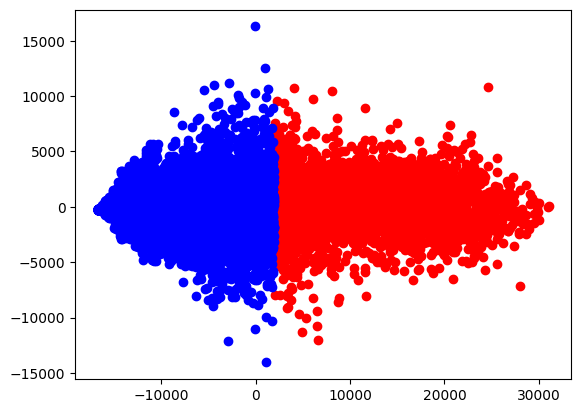

In [34]:
label_0 = y_pca[label == 0]
label_1 = y_pca[label == 1]
 
#Plotting the results
plt.scatter(label_0[:,0] , label_0[:,1] , color = 'red')
plt.scatter(label_1[:,0] , label_1[:,1] , color = 'blue')
plt.show()

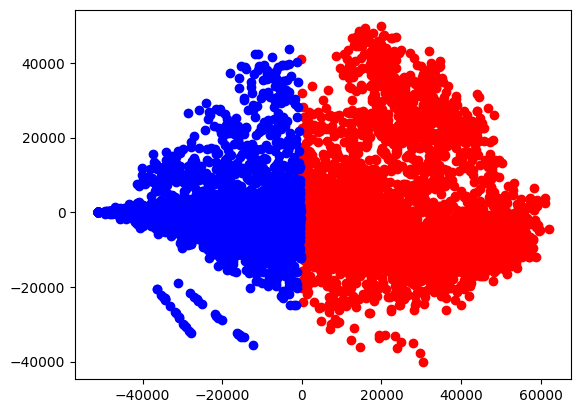

(array([[   178.65350958,  -3807.96648201],
        [  7511.52115039,  22120.4119772 ],
        [ 20874.600141  ,   1140.0790833 ],
        ...,
        [-25080.12020421,   -939.61240216],
        [-11784.21223898, -12882.74956055],
        [-24243.34871249,  -3732.80259307]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32))

In [38]:
path = "/Tmp/dingqian/MAT_samples"  
get_kmeans(path, key="input_right")